<a href="https://colab.research.google.com/github/balaobireddy408/OpenAI-Training/blob/main/EY_ClassificationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Complete the notebook to perform

# Data Exploration

# Feature Engineering

# Model Training and Evaluation to select the best model

In [116]:

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:

data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [119]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [123]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

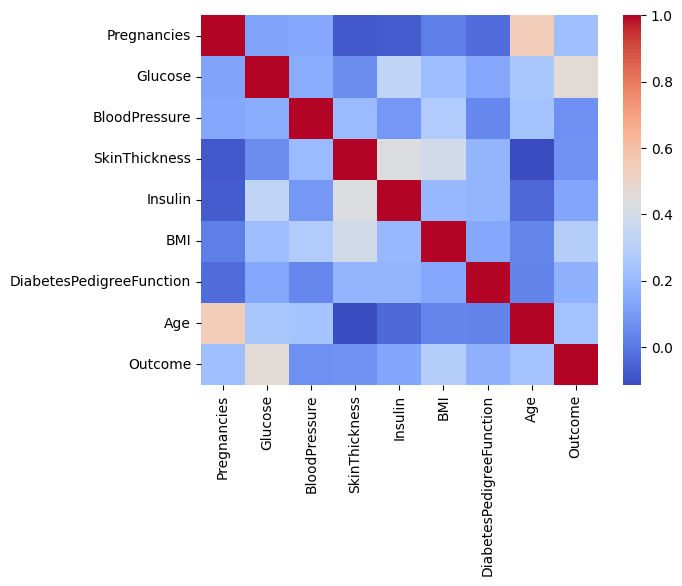

In [124]:
# correlations can be best visualized with a HEATMAP
import seaborn as sns
cors = data.corr()
sns.heatmap(cors, cmap = 'coolwarm')

In [126]:
y = data['Outcome']
x = data.iloc[:, 1:-1]
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [127]:

# SPLIT DATA-> training and scoring (testing is also known as SCORING)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [128]:

xtrain.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
132,170,64,37,225,34.5,0.356,30
572,111,58,31,44,29.5,0.430,22
673,123,100,35,240,57.3,0.880,22
761,170,74,31,0,44.0,0.403,43
42,106,92,18,0,22.7,0.235,48


In [129]:

ytrain.head()

132    1
572    0
673    0
761    1
42     0
Name: Outcome, dtype: int64

In [130]:
xtest.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
538,127,80,37,210,36.3,0.804,23
675,195,70,0,0,30.9,0.328,31
581,109,60,27,0,25.0,0.206,27
242,139,54,0,0,25.6,0.402,22
13,189,60,23,846,30.1,0.398,59


In [131]:

ytest.tail()

538    0
675    1
581    0
242    1
13     1
Name: Outcome, dtype: int64

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [133]:
predictions = model.predict(xtest)

In [134]:

predictions[:5]

array([ 0.97656307, -0.1129968 ,  0.54322156,  0.8683176 ,  0.70543831])

In [135]:
predictions.min(), predictions.max()

(-0.2618733563859904, 1.0338558213264666)

In [137]:
threshold = ( predictions.max() + predictions.min()) / 2
threshold

0.3859912324702381

In [138]:
binary_logic = lambda val: 1 if val > threshold else 0
p = [ binary_logic(prediction) for prediction in predictions]
p[:5]


[1, 0, 1, 1, 1]

In [140]:

from sklearn.metrics import accuracy_score
ascore = accuracy_score(p, ytest)

In [141]:

print('Linear regression accuracy was ' + str(ascore*100) + '%')

Linear regression accuracy was 70.77922077922078%


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [143]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
best_model_acc = None
best_model_f1 = None
best_model_p = None
best_model_r = None

best_model_name_acc = ""
best_model_name_f1 = ""
best_model_name_p = ""
best_model_name_r = ""

best_acc = -1
best_f1 = -1
best_precision = -1
best_recall = -1


all_accs = []
all_f1_scores = []
all_precions = []
all_recalls = []

In [144]:
for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain, ytrain)
  p = model.predict(xtest)
  a_score = accuracy_score(p, ytest)
  p_score = precision_score(p, ytest)
  r_score = recall_score(p, ytest)
  f_score = f1_score(p, ytest)


  all_accs.append(a_score)
  all_f1_scores.append(f_score)
  all_precions.append(p_score)
  all_recalls.append(r_score)
  print('Accuracy = ' + str(a_score))
  print('Precision = ' + str(p_score))
  print('Recall = ' + str(r_score))
  print('F1 Score = ' + str(f_score))

if a_score == 1.0: # if any model is 100% accurate, its a sign of overfitting
    print('Overfitting')
else:
  if a_score > best_acc:
    best_acc = a_score
    best_model_acc = algo
    best_model_name_acc = algo_name
  if f_score > best_f1:
    best_f1 = f_score

    best_model_f1 = algo
    best_model_name_f1 = algo_name
  if p_score > best_precision:
    best_precision = p_score
    best_model_p = algo
    best_model_name_p = algo_name
  if r_score > best_recall:
    best_recall = r_score
    best_model_r = algo
    best_model_name_r = algo_name
  print('*************')
  print()



Algorithm considered = DecisionTree100
Accuracy = 0.6363636363636364
Precision = 0.45614035087719296
Recall = 0.5098039215686274
F1 Score = 0.48148148148148145
Algorithm considered = DecisionTree10
Accuracy = 0.6233766233766234
Precision = 0.45614035087719296
Recall = 0.49056603773584906
F1 Score = 0.4727272727272727
Algorithm considered = DecisionTree200
Accuracy = 0.6168831168831169
Precision = 0.45614035087719296
Recall = 0.48148148148148145
F1 Score = 0.46846846846846846
Algorithm considered = DecisionTree50
Accuracy = 0.6363636363636364
Precision = 0.47368421052631576
Recall = 0.5094339622641509
F1 Score = 0.49090909090909085
Algorithm considered = RandomForest10
Accuracy = 0.7402597402597403
Precision = 0.49122807017543857
Recall = 0.717948717948718
F1 Score = 0.5833333333333334
Algorithm considered = RandomForest100
Accuracy = 0.7207792207792207
Precision = 0.45614035087719296
Recall = 0.6842105263157895
F1 Score = 0.5473684210526316
Algorithm considered = RandomForest200
Accura

In [145]:
best_model_name_acc

'Support Vector Machines with RBF'

In [146]:

best_model_name_f1

'Support Vector Machines with RBF'

In [147]:

best_model_name_p


'Support Vector Machines with RBF'

In [148]:

best_model_name_r


'Support Vector Machines with RBF'

In [149]:
dir(best_model_acc)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_

In [150]:

best_model_acc._get_coef()

array([[692.89684766,  45.32193771,  92.64269587, -95.7964007 ,
        340.42410346,  20.00873312, 255.59449049]])

In [151]:

len(best_model_acc._get_coef()[0]), len(xtrain.columns)

(7, 7)

In [152]:
xtrain.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [153]:
all_coef = best_model_acc._get_coef()[0]
all_columns = xtrain.columns
all_columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [154]:
final_equation = 'Outcome = '

for i in range(7):
  final_equation = final_equation + str(all_coef[i]) + ' * ' + all_columns[i] + ' + '

final_equation = final_equation + str(best_model_acc._intercept_)
print(final_equation)

f = open('file.model', 'wt')
f.write(final_equation)
f.close()

Outcome = 692.8968476613736 * Glucose + 45.32193771306629 * BloodPressure + 92.64269586810224 * SkinThickness + -95.79640069934248 * Insulin + 340.42410345745617 * BMI + 20.008733120268055 * DiabetesPedigreeFunction + 255.5944904905664 * Age + [-0.42137214]


In [155]:

import pickle
pickle.dump(best_model_acc, open("model.best", 'wb'))

In [156]:

loaded_model = pickle.load(open("model.best", 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)


0.6883116883116883


In [157]:
loaded_model.predict(xtest)

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])